# MNIST_explore


# 索引
[取得MNIST數據集](#取得MNIST數據集)

[展示2X5個子圖圖形](#展示2X5個子圖圖形)

[將下載資料集合成整合一個資料集](#將下載資料集合成整合一個資料集)

## 取得MNIST數據集

網址：http://yann.lecun.com/exdb/mnist/index.html
    
<pre>
1. 訓練數據集影像     ‘train_img’:‘train-images-idx3-ubyte.gz’
                    (壓縮檔大小9.9MB，解壓縮之後47MB，60000張樣本）
2. 訓練數據集標籤     ‘train_label’:‘train-labels-idx1-ubyte.gz’
                    (壓縮檔大小29KB，解壓縮之後60MB，60000張樣本標籤）
3. 測試數據集影像     'test_img':'t10k-images-idx3-ubyte.gz'
                    (壓縮檔大小1.6MB，解壓縮之後7.8MB，10000張樣本）
4. 測試數據集標籤     'test_label':'t10k-labels-idx1-ubyte.gz'}
                    (壓縮檔大小5KB，解壓縮之後10KB，10000張樣本標籤）
</pre>

In [1]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """從指定路徑 `path` 加載 MNIST 數據集"""
    """Load MNIST data from `path`"""

    # 定義標籤文件的路徑，根據 `kind` 來選擇（train 或 test）
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
                            
    # 定義圖像文件的路徑，根據 `kind` 來選擇（train 或 test）
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)
    
    # 打開標籤文件，讀取標籤數據
    with open(labels_path, 'rb') as lbpath:
        # 讀取前 8 個字節（magic number 和 標籤數量），並使用 '>II' 格式解包
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        
        # 從文件中讀取剩餘的標籤數據，標籤以無符號 8 位整數（uint8）存儲
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)
    # 打開圖像文件，讀取圖像數據
    with open(images_path, 'rb') as imgpath:
         # 讀取前 16 個字節（magic number、圖像數量、圖像的行數與列數），並使用 '>IIII' 格式解包
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))

        # 從文件中讀取圖像數據，每個像素點是無符號 8 位整數（uint8）
        # 並將數據重塑為 (num, 784) 的形狀，784 是 28x28（每個圖像的像素）                                       
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)
        # 將圖像數據進行歸一化，將像素值從 [0, 255] 範圍轉換為 [-1, 1]
        images = ((images / 255.) - .5) * 2
    # 返回圖像數據與標籤
    return images, labels

In [17]:
dir

<function dir>

In [18]:
import sys
import gzip
import shutil

# 檢查 Python 的版本，根據版本決定寫入模式
# 如果是 Python 3.x，則使用 'wb' (二進制寫入模式)，否則使用 'w' (文字模式)
if (sys.version_info > (3, 0)):
    writemode = 'wb' # Python 3.x 使用二進制模式
else:
    writemode = 'w' # Python 2.x 使用文字模式

# 取得當前目錄下所有以 'ubyte.gz' 結尾的文件，這些是壓縮的 MNIST 數據文件
zipped_mnist = [f for f in os.listdir('./') if f.endswith('ubyte.gz')]

# 遍歷找到的壓縮文件，並進行解壓縮
for z in zipped_mnist:
    # 使用 gzip 打開壓縮文件，讀取其內容 # 打開解壓縮後的文件，去掉文件名中的 ".gz"（即 z[:-3]）並以 writemode 模式寫入
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        # 將解壓縮的內容寫入到新的文件中
        outfile.write(decompressed.read())

## 2X5個子圖圖形

In [19]:
# 從當前路徑中載入 MNIST 訓練數據集
# kind='train' 表示載入訓練數據集
X_train, y_train = load_mnist('', kind='train')

# 打印訓練數據集的行數（樣本數量）和列數（特徵數量）
# X_train.shape[0] 表示樣本數量，即行數（60000）
# X_train.shape[1] 表示特徵數量，即每個樣本的像素值數量（28*28 = 784）
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [5]:
# 從當前路徑中載入 MNIST 測試數據集
# kind='t10k' 表示載入測試數據集
X_test, y_test = load_mnist('', kind='t10k')

# 打印測試數據集的行數（樣本數量）和列數（特徵數量）
# X_test.shape[0] 表示測試集樣本數量，即行數（10000）
# X_test.shape[1] 表示特徵數量，即每個樣本的像素值數量（28*28 = 784）
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


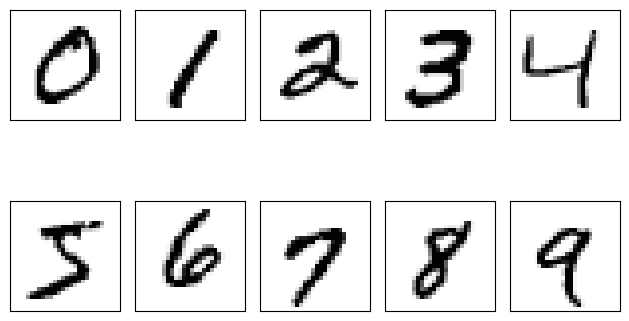

In [20]:
import matplotlib.pyplot as plt

# 創建一個 2 行 5 列的子圖 (subplot)，這裡會有 10 個子圖
# sharex=True 和 sharey=True 表示所有子圖共享 x 軸和 y 軸
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)

# 將 2x5 的軸數組展平成 1 維陣列，方便後續迴圈中進行操作
ax = ax.flatten()

# 遍歷 0 到 9，將每個數字的第一張圖像顯示在對應的子圖中
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

# 隱藏第 0 個子圖的 x 軸和 y 軸刻
ax[0].set_xticks([])
ax[0].set_yticks([])

# 自動調整子圖間的間距，使其佈局緊湊
plt.tight_layout()

# 將圖像保存為高解析度（300 dpi）的 PNG 檔，檔名為 '10_2_1.png'
plt.savefig('10_2_1.png', dpi=300)

# 顯示所有子圖
plt.show()

## 將下載資料集合成整合一個資料集

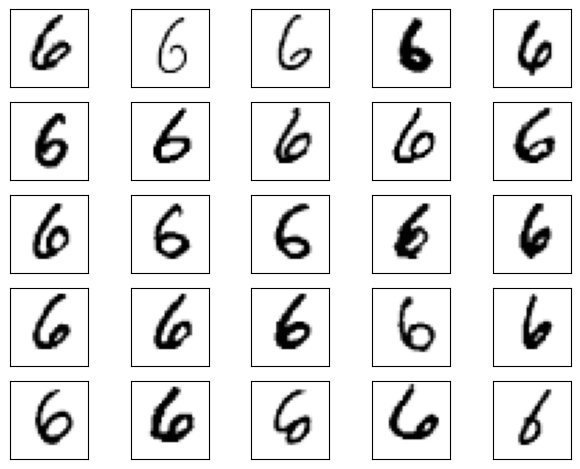

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 6][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [8]:
import numpy as np

np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [9]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [10]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train',
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)